In [1]:
import os
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plti(image):
    plt.figure(figsize=(10,10))
    if len(image.shape) < 3:
        plt.imshow(image, cmap='gray')
    elif image.shape[2] == 1:
        plt.imshow(image[:,:,0], cmap='gray')
    else:
        plt.imshow(image)

In [3]:
def puzzle_image(image, mask):
    mask_1 = np.zeros_like(mask[:, :, 0])
    mask_1[np.where(mask[:, :, 0] > 230)] = 1.
    
    mask_2 = np.zeros_like(mask[:, :, 1])
    mask_2[np.where(mask[:, :, 1] > 150)] = 1.
    
    h, w = image.shape[:2]
    image_flipped = image[:, ::-1, :]

    mask_1 = cv2.resize(mask_1, (w, h), cv2.INTER_NEAREST)
    mask_1_3ch = np.stack((mask_1, mask_1, mask_1), axis=-1)
    
    mask_2 = cv2.resize(mask_2, (w, h), cv2.INTER_NEAREST)
    mask_2_3ch = np.stack((mask_2, mask_2, mask_2), axis=-1)
    
    result = image_flipped * mask_1_3ch + image * mask_2_3ch
    
    return result

image = cv2.cvtColor(cv2.imread("./source_images/image.jpg"), cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(cv2.imread("./patterns/pattern_5_bin_big_6mp.png"), cv2.COLOR_BGR2RGB)

result = puzzle_image(image, mask)
plti(result)

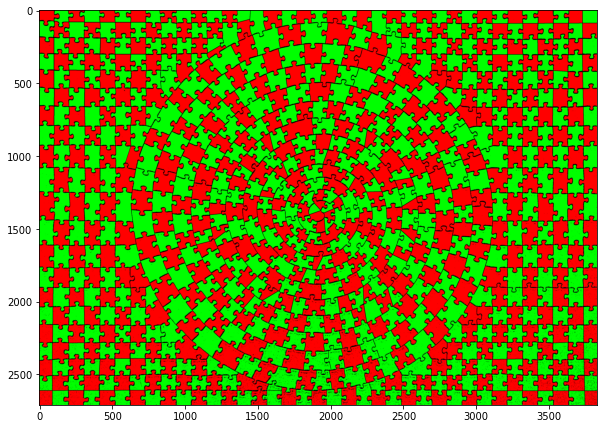

In [4]:
mask = cv2.cvtColor(cv2.imread("./puzzle_photos/photo1_bin2_rg_mask.png", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
plti(mask)

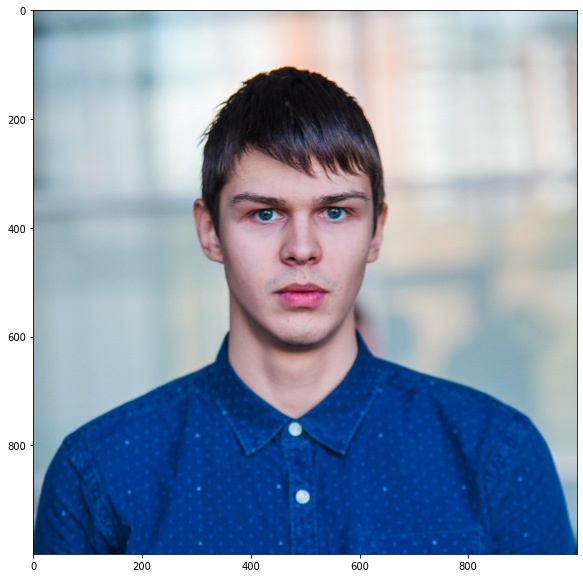

In [6]:
image = cv2.cvtColor(cv2.imread("./source_images/image.jpg"), cv2.COLOR_BGR2RGB)
plti(image)

In [7]:
mask_1 = np.zeros_like(mask[:, :, 0])
mask_1[np.where(mask[:, :, 0] > 230)] = 1.

mask_2 = np.zeros_like(mask[:, :, 1])
mask_2[np.where(mask[:, :, 1] > 150)] = 1.

h, w = image.shape[:2]
image_flipped = image[:, ::-1, :]

mask_1 = cv2.resize(mask_1, (w, h), cv2.INTER_NEAREST)
mask_1_3ch = np.stack((mask_1, mask_1, mask_1), axis=-1)

mask_2 = cv2.resize(mask_2, (w, h), cv2.INTER_NEAREST)
mask_2_3ch = np.stack((mask_2, mask_2, mask_2), axis=-1)

result = image_flipped * mask_1_3ch + image * mask_2_3ch

plti(result)

In [10]:
cv2.imwrite("./result_circle.png", cv2.cvtColor(result, cv2.COLOR_RGB2BGR))

True

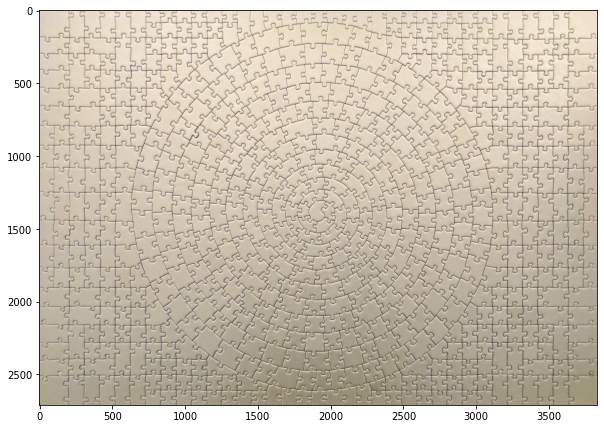

In [18]:
texture = cv2.cvtColor(cv2.imread("./puzzle_photos/photo1_texture.png", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
plti(texture)

In [19]:
result_float = result.astype(np.float32)
texture_float = texture.astype(np.float32) / 255.

In [20]:
texture_float = cv2.resize(texture_float, (w, h), cv2.INTER_LINEAR)

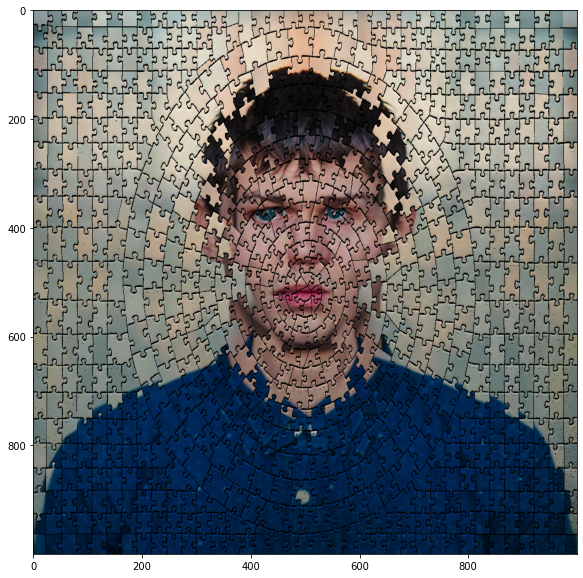

In [21]:
texture = texture.astype(np.float32) / 255.
texture = cv2.resize(texture, (w, h), cv2.INTER_LINEAR)

result_plus_texture = (result_float * texture_float).astype(np.uint8)

plti(result_plus_texture)

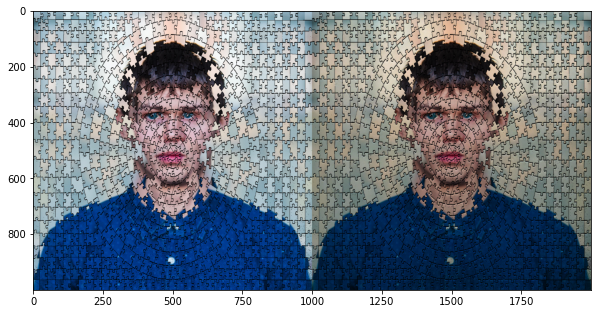

In [22]:
plti(np.hstack((result, result_plus_texture)))

In [24]:
report = cv2.cvtColor(result_plus_texture, cv2.COLOR_BGR2RGB)
cv2.imwrite('./result_plus_texture.png', report)

True